<a href="https://colab.research.google.com/github/VuMaiTuan/20144483-VuMaiTuan/blob/main/Nhan_dien_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Nhan dien khuon mat

/content/drive/MyDrive/Colab Notebooks/Nhan dien khuon mat


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Nhan dien khuon mat/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 120 images belonging to 3 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Nhan dien khuon mat/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 15 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'MTruong': 0, 'MTuan': 1, 'QTuan': 2}

In [ ]:
validation.class_indices

{'MTruong': 0, 'MTuan': 1, 'QTuan': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation)

Epoch 1/100
4/4 [==============================] - 31s 7s/step - loss: 15.0806 - accuracy: 0.4583 - val_loss: 1.9547 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 25s 6s/step - loss: 1.4373 - accuracy: 0.4583 - val_loss: 0.9984 - val_accuracy: 0.6667
Epoch 3/100
4/4 [==============================] - 26s 7s/step - loss: 0.8632 - accuracy: 0.6250 - val_loss: 0.9672 - val_accuracy: 0.4667
Epoch 4/100
4/4 [==============================] - 25s 6s/step - loss: 0.7401 - accuracy: 0.7333 - val_loss: 0.4538 - val_accuracy: 0.9333
Epoch 5/100
4/4 [==============================] - 25s 6s/step - loss: 0.5213 - accuracy: 0.8167 - val_loss: 0.6581 - val_accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 25s 6s/step - loss: 0.3902 - accuracy: 0.8833 - val_loss: 0.1858 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 25s 7s/step - loss: 0.1579 - accuracy: 0.9583 - val_loss: 0.0305 - val_accuracy: 1.0000
Epoch 8/100
4/4 [=========

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 1.1016769576599472e-06
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

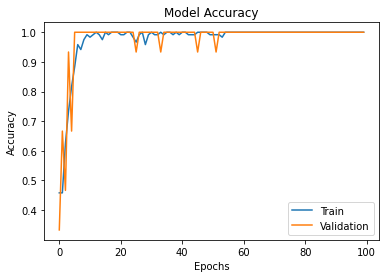

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("NhanDienKhuonMat.h5")

1/1 [==============================] - 0s 18ms/step
MTruong


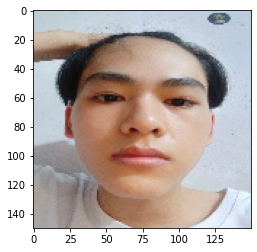

1/1 [==============================] - 0s 18ms/step
MTruong


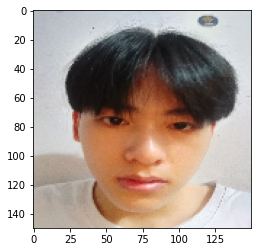

1/1 [==============================] - 0s 15ms/step
QTuan


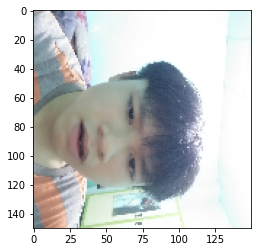

1/1 [==============================] - 0s 15ms/step
QTuan


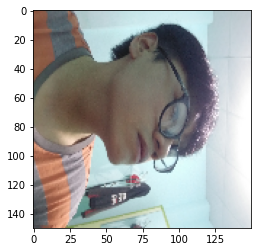

1/1 [==============================] - 0s 18ms/step
MTuan


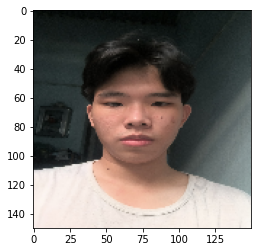

1/1 [==============================] - 0s 17ms/step
MTuan


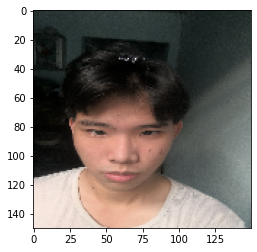

1/1 [==============================] - 0s 15ms/step
MTuan


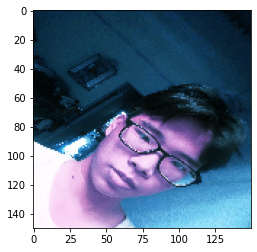

1/1 [==============================] - 0s 17ms/step
MTruong


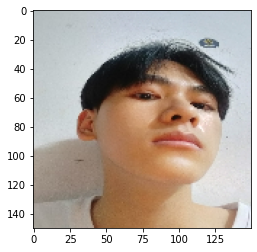

1/1 [==============================] - 0s 17ms/step
MTuan


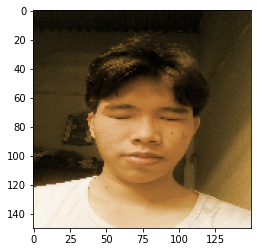

1/1 [==============================] - 0s 18ms/step
QTuan


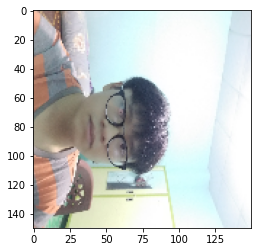

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/Nhan dien khuon mat/Test"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model.predict(img)
  if round(result[0][0])==1:
    prediction='MTruong'
  if round(result[0][1])==1:
    prediction='MTuan'
  if round(result[0][2])==1:
    prediction='QTuan'
  print(prediction)
  plt.show()